<a href="https://colab.research.google.com/github/faustyT/FaustyTubo/blob/main/Wholesale_customer_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WHOLESALE CUSTOMER DATA

I am working on wholesale Customer Data using K-means clustering. This dataset contain different product categories purchased by various customers across multiple regions and channels. i will use K-Means clustering to segment customers based on their purchasing behavior, which can help businesses target different customer groups with tailored marketing strategies.

Project Outline
1. Load and Explore the Data
2. Preprocess the Data
3. Choose the Optimal Number of Clusters
4. Apply K-Means Clustering
5. Analyze and Interpret Clusters

In [1]:
#import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Wholesale customers data.csv to Wholesale customers data.csv


## Step 1. Read the Data

In [3]:
data =  pd.read_csv('Wholesale customers data.csv')
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [4]:
#make a copy of the data
df = data.copy()

In [5]:
df.shape

(440, 8)

In [6]:
#check for null values
df.isnull().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


In [7]:
#check for duplicates values
df.duplicated().sum()

0

In [8]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


## Step 2. Preprocessing the data

Feature Selection: exclude Channel and Region for clustering since they may not contribute as meaningfully to customer segmentation based on product categories.

Data Scaling: Using StandardScaler to scale all numerical features to have mean 0 and standard deviation 1.

In [10]:
#import scaler library
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [11]:
#select only the relevants columns
X = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]

X_scaler = scaler.fit_transform(X)

###  Step 3: Choose the Optimal Number of Clusters
To determine the optimal number of clusters
𝑘
k, using the Elbow Method and the Silhouette Score.

Elbow Method
The Elbow Method plots Within-Cluster Sum of Squares (WCSS) against different
𝑘
k values to see where the rate of WCSS reduction slows down. This “elbow” point suggests the best
𝑘
k.

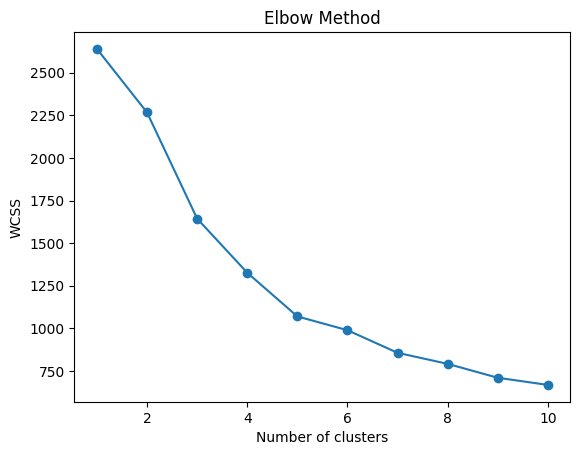

In [15]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaler)
    wcss.append(kmeans.inertia_)

#ploting the Elbow method graph
plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


The optimal
𝑘
k is at the point where adding another cluster doesn’t significantly reduce WCSS. This is usually seen as a bend or “elbow” in the graph.

### Silhouette Score
We can also calculate the Silhouette Score for each
𝑘
k, which quantifies how well each point fits within its cluster. Higher scores indicate better clustering quality.

In [24]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaler)
    score = silhouette_score(X_scaler, kmeans.labels_)
    print(f"For n_clusters = {k}, silhouette score is {score:.2f}")


For n_clusters = 2, silhouette score is 0.40
For n_clusters = 3, silhouette score is 0.46
For n_clusters = 4, silhouette score is 0.35
For n_clusters = 5, silhouette score is 0.37
For n_clusters = 6, silhouette score is 0.28
For n_clusters = 7, silhouette score is 0.28
For n_clusters = 8, silhouette score is 0.32
For n_clusters = 9, silhouette score is 0.29
For n_clusters = 10, silhouette score is 0.23


### Step 4: Apply K-Means Clustering
Based on the Elbow Method and Silhouette Scores, let’s say the optimal
𝑘
k is 4. Now, we’ll apply K-Means with
𝑘
=
4
k=4 clusters and fit it to our scaled data.

In [25]:
#apply KMeans with the chosen number of cluster k=4
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(X_scaler)

#retrieve the cluster label for each data point
df['Cluster']= kmeans.labels_


Now, each customer has an assigned cluster number stored in the new Cluster column.



### Step 5: Analyze and Interpret Clusters
####1. Examine Cluster Centers:
######. Each cluster center represents the mean value of each feature for the points in that cluster.
######. By inspecting cluster centers, we can infer the purchasing characteristics of each customer segment.

In [28]:
#reverse the scaling to interpret cluster center in the original scale
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=X.columns)
cluster_centers_df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,5474.926606,10194.192661,15587.807339,1464.385321,6734.642202,1642.458716
1,40136.857143,19452.142857,15026.285714,23713.714286,2374.142857,15735.142857
2,15964.900000,34708.500000,48536.900000,3054.600000,24875.200000,2942.800000
3,13511.964968,3044.394904,3850.121019,3170.350318,854.808917,1122.105096


###2. Visualize the Clusters:
We can plot the clusters for visual insights, using PCA (Principal Component Analysis) to reduce to 2D space.

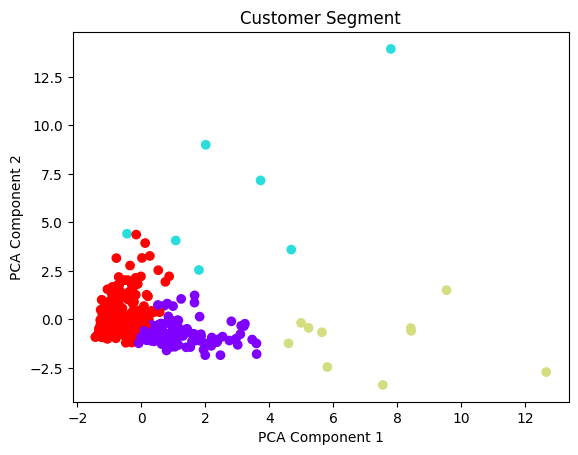

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaler)

#plot clusters
plt.scatter(X_pca[:,0], X_pca[:,1], c=df['Cluster'], cmap='rainbow')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Customer Segment')
plt.show()

####3. Interpret Results:
#####Examine the cluster_df centers and describe each cluster. For example:
######. Cluster 0: Customers with high purchases in Grocery and Milk categories.
#####. Cluster 1: Low spending across categories, indicating possibly budget-conscious customers.
#####. Cluster 2: High spending in Fresh and Frozen, likely purchasing for restaurants or catering.
#####. Cluster 3: High spending across all categories, indicating premium or high-spending customers.